# LOCAL OUTLIER FACTOR (LOF)
#### ANOMALY DETECTION/OUTLIER REMOVAL ALGORITHM.
---

### INSTRUCTIONS TO RUN THIS NOTEBOOK.
The local outlier factor (LOF) is a distance-based algorithm which requires high computational resources. The models were already trained and saved for easy usage.

> Running every line of code may result in long execution time.

Please pay special attention to running the cells with model training codes (model.fit). General purpose laptops and computers may not have adequate RAM/GPU to train the models again. You can always reuse the already trained models by loading the models back.

The saved models, model histories, y_test data are all loaded at **SECTION 9 - PERFORMANCE COMPARISON SUMMARY.** Enjoy reading through the sections and outputs I have gathered in getting the models and their dependent data and files.




# 0. LOAD LIBRARIES

In [8]:
import numpy as np
import pandas as pd

"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
"""

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import make_scorer\n'

In [9]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figsize = (20, 5)
plt.dpi = 100

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/"

# 1. LOAD TIMESERIES DATA

In [12]:
# Load the dataset
fname = PATH+'Dataset/clean.csv'
raw_data = pd.read_csv(fname)

In [13]:
#!pip install skimpy
raw_data['act'] = pd.Categorical(raw_data.act)
raw_data['id'] = pd.Categorical(raw_data.id)

In [ ]:
from skimpy import skim
skim(raw_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types               Categories                                       │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Number of rows    │ 1412865 │ │ float64     │ 6     │ │ act                   │                               │
│ │ Number of columns │ 8       │ │ category    │ 2     │ │ id                    │                               │
│ └───────────────────┴─────────┘ └─────────────┴───────┘ └───────────────────────┘                               │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0    ┃ p25     ┃ p50      ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ rotationRate.x       │   0 │     0 │   0.0053 │   1.3 │   -17 │   -0.29 │ -0.00039 │  0.12 │   10 │    ▇▁  │  │
│ │ rotationRate.y       │   0 │     0 │    0.015 │   1.2 │   -18 │   -0.17 │  0.00032 │  0.23 │   18 │    ▂▇  │  │
│ │ rotationRate.z       │   0 │     0 │    0.013 │  0.81 │   -12 │  -0.097 │  0.00018 │  0.11 │   11 │    ▂▇  │  │
│ │ userAcceleration.x   │   0 │     0 │  -0.0039 │  0.33 │  -6.4 │  -0.048 │  0.00089 │ 0.044 │  7.1 │    ▇▁  │  │
│ │ userAcceleration.y   │   0 │     0 │    0.044 │  0.53 │  -5.7 │  -0.062 │   0.0043 │ 0.052 │  7.3 │    ▇   │  │
│ │ userAcceleration.z   │   0 │     0 │    0.039 │  0.38 │  -7.7 │  -0.024 │   0.0034 │   0.1 │  8.1 │    ▇▂  │  │
│ └──────────────────────┴─────┴───────┴──────────┴───────┴───────┴─────────┴──────────┴───────┴──────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ act                              │         0 │              0 │ False                 │                  6 │  │
│ │ id                               │         0 │              0 │ False                 │                 24 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
raw_data['id'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [14]:
raw_data['id'] = pd.factorize(raw_data['id'])[0]
raw_data['act'] = pd.factorize(raw_data['act'])[0]
ACT_LABELS = ["dws","ups", "wlk", "jog", "std", "sit"]
out_cols = list(raw_data.columns[:6]) #Define the outlier columns

In [10]:
raw_data['act'].unique()

array([0, 1, 2, 3, 4, 5])

In [15]:
out_cols

['rotationRate.x',
 'rotationRate.y',
 'rotationRate.z',
 'userAcceleration.x',
 'userAcceleration.y',
 'userAcceleration.z']

---
## 2. DATA EXPLORATION

### Find the minority count of the activity from each test subject.

In [12]:
# Initialize variables to store the minimum 'act' class and its count
min_act_class = None
min_act_count = float('inf')  # Initialize with positive infinity
min_id = -1
# Loop through each 'id' value
for user_id in range(24):
    # Filter the data for the current 'id'
    filtered_data = raw_data[raw_data['id'] == user_id]

    # Calculate 'act' class counts for the current 'id'
    act_counts = filtered_data['act'].value_counts()

    # Find the minimum 'act' class and its count for the current 'id'
    min_act_for_id = act_counts.idxmin()  # 'idxmin()' gives the index of the minimum count (i.e., the 'act' class)
    min_count_for_id = act_counts.min()  # Minimum count

    # Update the overall minimum if necessary
    if min_count_for_id < min_act_count:
        min_act_count = min_count_for_id
        min_act_class = min_act_for_id
        min_id = user_id

print(f" ---->The 'activity' with the minimum count is '{ACT_LABELS[min_act_class]}' with a count of {min_act_count} for user ID: {min_id}.")


 ---->The 'activity' with the minimum count is 'ups' with a count of 2791 for user ID: 12.


### 2.1 DATA RESAMPLING

Select the first 2750 rows to have equal representation of data in each acitivity per test subject.

In [13]:
rows_per_class_per_id = 2750
id_count = 24
act_count = 6
# Initialize an empty DataFrame to store the selected data
rep_data = pd.DataFrame()

# Loop through each 'id' value
for user_id in range(id_count):
    # Loop through each 'act' class
    for act in range(act_count):
        # Filter the data for the current 'id' and 'act' combination
        selected_data = raw_data[(raw_data['id'] == user_id) & (raw_data['act'] == act)]
        if selected_data.empty:
          print(f'No data found in ID: {user_id} and Activity: {act}')
        # Select the first 2791 rows for the current combination
        selected_rows = selected_data.head(rows_per_class_per_id)
        #print(f'Selected_rows: {len(selected_rows)} and Activity: {act}')
        # Append the selected rows to the selected_data DataFrame
        rep_data = pd.concat([rep_data, selected_rows])
        #print(f'Rep Data: {len(rep_data)} for ID: {user_id} and Activity: {act}')
# Reset the index of the selected_data DataFrame
rep_data.reset_index(drop=True, inplace=True)

# Now, rep_data contains the first 2791 rows for each 'act' and 'id' combination
print(f'Total rows selected is: {len(rep_data)}')

Total rows selected is: 396000


Compare imbalance raw data against balanced data

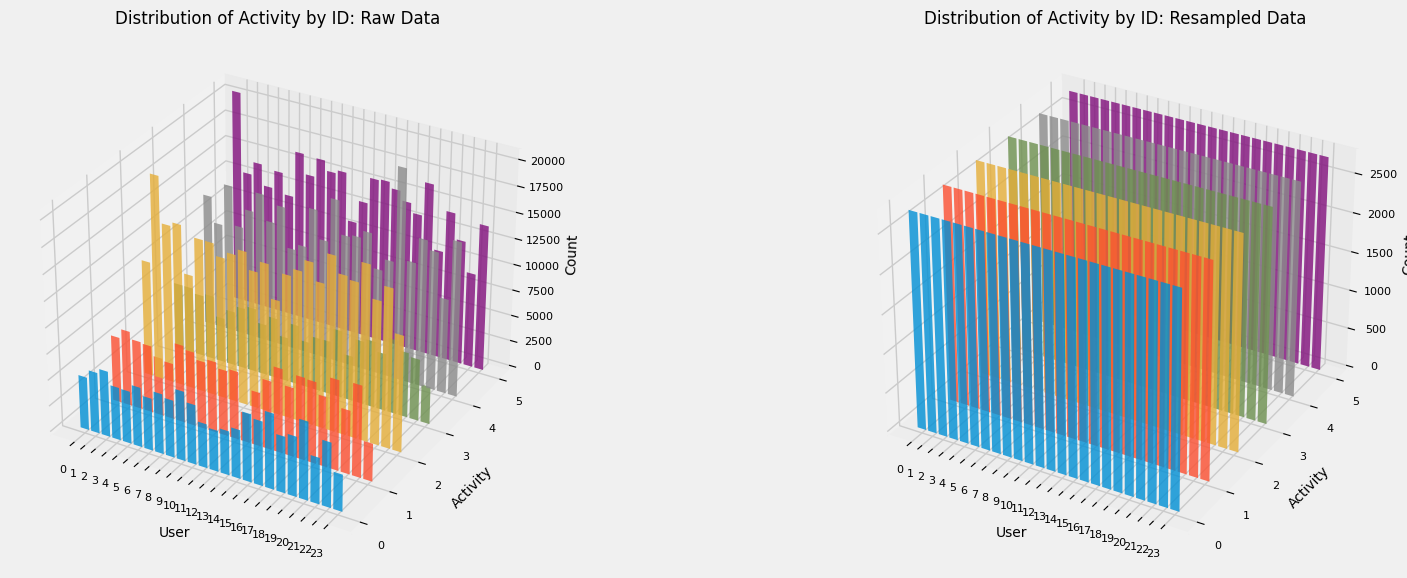

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("fivethirtyeight")
# Group the data by 'id' and 'act' and count occurrences
count_data = raw_data.groupby(['id', 'act']).size().reset_index(name='count')

fig = plt.figure(figsize=(20, 6))# Create a larger 3D figure for the first plot
ax1 = fig.add_subplot(121, projection='3d')

nbins = len(count_data['id'].unique())# Number of bins
z_array = count_data['act'] # Z values (height of bars)

# Iterate through the data and create 3D bars for the first plot
for i, row in count_data.iterrows():
    x = [row['id']]
    y = [row['act']]
    z = [row['count']]
    ax1.bar(x, z, zs=y, zdir='y', alpha=0.8)


for i in ('x', 'y', 'z'):
    ax1.tick_params(axis=i, labelsize=8, colors='black')
ax1.set_title('Distribution of Activity by ID: Raw Data', fontsize=12)
# Group the data by 'id' and 'act' and count occurrences for the second plot
rep_count_data = rep_data.groupby(['id', 'act']).size().reset_index(name='count')


ax2 = fig.add_subplot(122, projection='3d')
nbins = len(rep_count_data['id'].unique())
z_array = rep_count_data['act']

# Iterate through the data and create 3D bars for the second plot
for i, row in rep_count_data.iterrows():
    x = [row['id']]
    y = [row['act']]
    z = [row['count']]
    ax2.bar(x, z, zs=y, zdir='y', alpha=0.8)

# Set labels for the plots
for j in (ax1, ax2):
  j.set_xlabel('User', fontsize=10, color='black')
  j.set_ylabel('Activity', fontsize=10, color='black')
  j.set_zlabel('Count', fontsize=10, color='black')
  j.set_xticks(range(24))

for i in ('x', 'y', 'z'):
    ax2.tick_params(axis=i, labelsize=8, colors='black')
ax2.set_title('Distribution of Activity by ID: Resampled Data', fontsize=12)

plt.tight_layout()# Adjust spacing between the two plots
plt.show()


## 3. OUTLIER CHECKS

I inspect the data and outlines possible outliers on the timeseries plots.

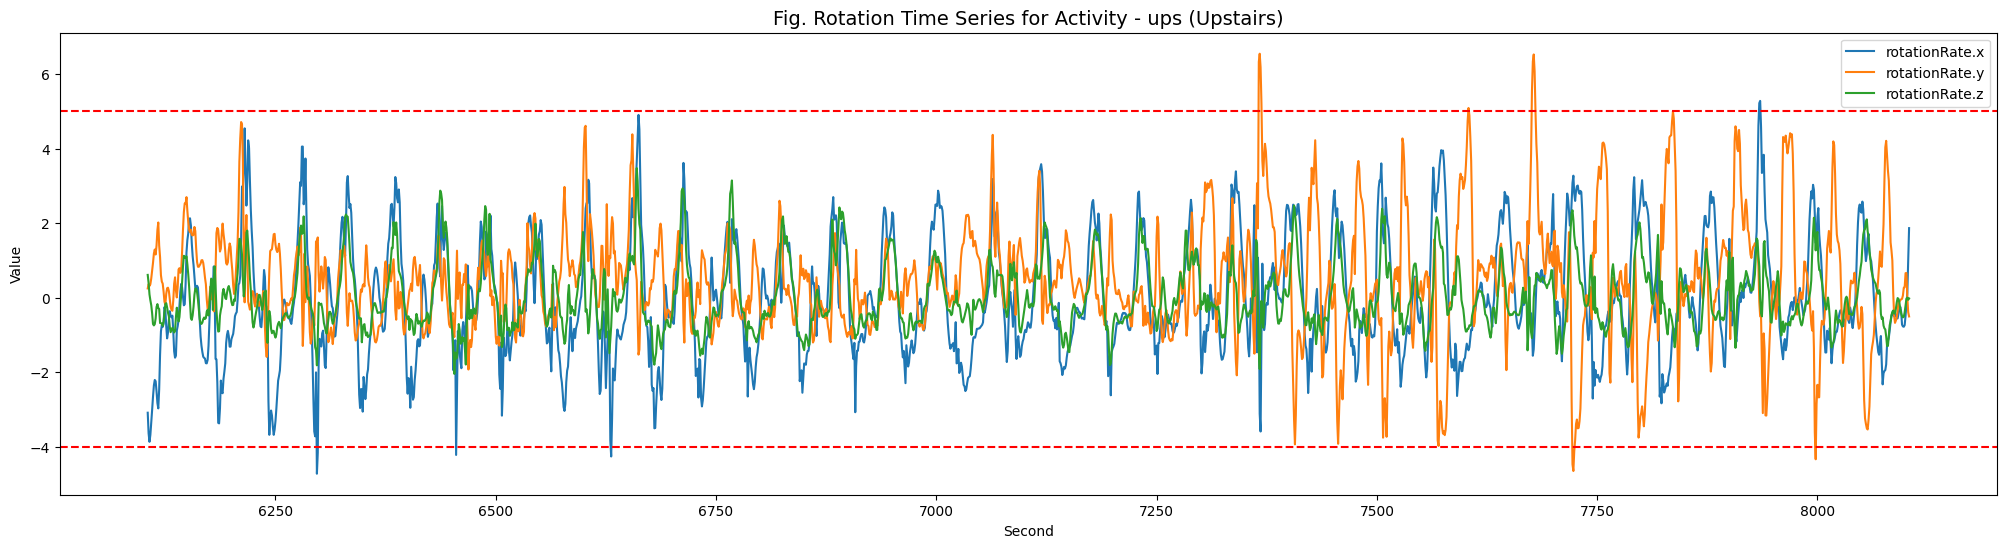

In [15]:
from pandas import Series
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplt
##________________________________
plt.style.use('default')
data = (raw_data[raw_data['act']==1])
#data.iloc[1000:1500, 0:3]
## 10 seconds
data = pd.DataFrame(data.iloc[1000:3000,0:3])
data.plot()
plt.xlabel('Second', fontsize=10)
plt.ylabel('Value', fontsize=10)
lgnd=plt.legend()
lgnd.get_texts()[0].set_text('rotationRate.x')
lgnd.get_texts()[1].set_text('rotationRate.y')
lgnd.get_texts()[2].set_text('rotationRate.z')
fig = pyplt.gcf()
fig.set_size_inches(25, 6)

# Add red dashed lines at values 5 and -4
plt.axhline(y=5, color='red', linestyle='--', label='Value 5')
plt.axhline(y=-4, color='red', linestyle='--', label='Value -4')

plt.title(f"Fig. Rotation Time Series for Activity - {ACT_LABELS[1]} (Upstairs)", fontsize=14)
plt.rc('font', size=12)
plt.show()

### 3.1 INTER-QUARTILE RANGES

We will use boxplot to check if the data fits within the quartile ranges. The outliers are data points that fall above and below the whiskers.

In [16]:
import warnings
# Suppress the UserWarning about the layout keyword
warnings.filterwarnings("ignore", category=UserWarning)

plt.style.use('ggplot')
def plot_quartiles(cols):
  # Create subplots for the first row of box plots
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  boxplot = raw_data[cols + ["act"]].boxplot(by="act", ax=axes, layout=(1, 3), fontsize=10, flierprops=dict(marker='o', markersize=2))
  for ax in axes:
      ax.set_title(ax.get_title(), fontsize=10)


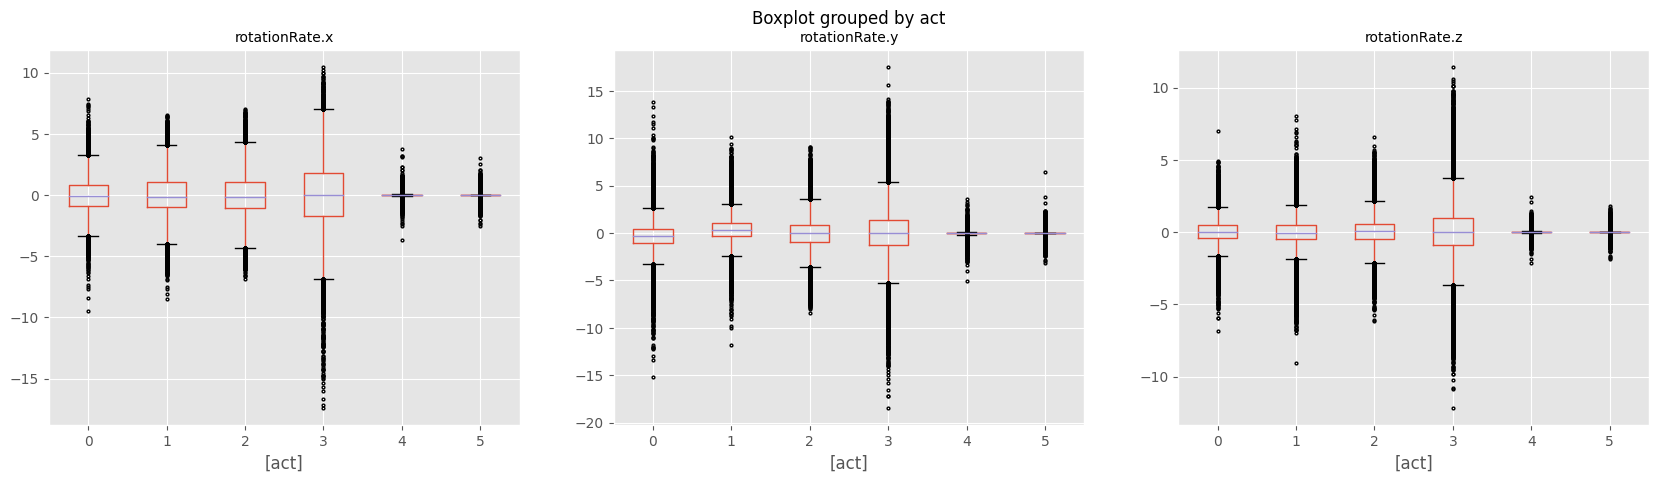

In [17]:
# Rotation Data
plot_quartiles(out_cols[:3])

In [ ]:
# UserAcceleration Data
plot_quartiles(out_cols[3:])

In the above dataset, we can see that there are instances lying beyond the upper and the lower whiskers of the boxplot. As evident, there are possible outliers in the dataset.

## 4. DATA NORMALIZATION

We are preparing the numeric features for finding the quality portion of the data by removing the noise. The noise are outliers in the data. Therefore, noise or anomalies will be detected first, then they will be removed from the dataset to make it quality portion. The quality portion will then be fed into the CNN model.

In [18]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(raw_data[out_cols])

ASSIGN COLUMNS BACK TO THE SCALED DATA.

In [19]:
X_scaled = pd.DataFrame(X_scaled) #Converts the Xtrain array into dataframe
#xtest_scaled = pd.DataFrame(Xtest)
X_scaled.columns = out_cols
X_scaled[1:2] #Check one row

rotationRate.x  rotationRate.y  rotationRate.z  userAcceleration.x  \
1         0.64715        0.334183        0.780671            0.680407   

   userAcceleration.y  userAcceleration.z  
1           -0.015918            0.200935

# 5. ANOMALIES DETECTION USING Local Outlier Factor (LOF)



> The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. ~ [ScikitLearn](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)


 The LOF algorithm marks the outliers based on the distance of the data-point's neighbors. This gives outliers in different part of the data differently. Thus, the limitation of kNN to deal with data with numerous densities are catered by LOF. We use 20 neighbors (as a rule of thumb) and based on this distance, the LOF decides if the datapoints are isolated or not. If isolated, it will be marked outlier. Therefore, the anomalies can be within the normal range (IQR) if it falls beyond the local and global densities. The datapoints that the boxplot shows outside the whiskers may not be outlier since they might fall within the local densities of 20 neighbour. Thus, this algorithm deals with the outliers from a perspective based on distance/densities rather than the distribution.

In [ ]:
from tensorflow.python import platform
from sklearn.neighbors import LocalOutlierFactor
import time


def outlier_marker(dataset, data_cols):
    dataset = dataset.copy()
    lof = LocalOutlierFactor(n_neighbors=20)

    # Start measuring time
    start_t = time.time()

    data = dataset[data_cols]

    start_t = time.time()
    outliers = lof.fit_predict(data)

  # Stop measuring time
    end_t = time.time()

    # Calculate the elapsed time
    elapsed_time_lof = end_t - start_t
    print(f"---> LOF model completed in: {elapsed_time_lof} seconds")

    X_scores = lof.negative_outlier_factor_

    dataset["outlier_"] = outliers == -1 # If outliers == -1, set the outlier_ column to True.
    return dataset, outliers, X_scores



## 5.1 HYPERPARAMETER TUNING

To find the optimal values of hyperparameters, we perform series of mathematical computations to do this. The hyperparameter tuning is based on a published paper by Xu et al.,
`[Xu, Z., Kakde, D., & Chaudhuri, A. (2019). Automatic Hyperparameter Tuning Method for Local Outlier Factor, with Applications to Anomaly Detection. 2019 IEEE International Conference on Big Data (Big Data), 4201–4207. https://doi.org/10.1109/BigData47090.2019.9006151 ]`

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import time
import numpy as np

def tune_hpara(dataset, data_cols, c):
    dataset = dataset.copy()
    """
    # Step 1: Define the range of values for k and c
    k_values = [10,15, 20]  # Choose appropriate values for k
    c_values = [0.05, 0.07, 0.09]  # Choose appropriate values for c

    best_k = None
    best_c = None
    best_score = -float("inf")

    for k in k_values:
        for c in c_values:
    """
    lof = LocalOutlierFactor(n_neighbors=20, contamination=c)

    # Start measuring time
    start_t = time.time()

    data = dataset[data_cols]

    start_t = time.time()
    outliers = lof.fit_predict(data)
    end_t = time.time()

    elapsed_time_lof = end_t - start_t
    print(f"---> LOF model with c={c} completed in: {elapsed_time_lof} seconds")

    X_scores = lof.negative_outlier_factor_


    dataset["outlier_"] = outliers == -1
    print(f"Total Outlier:{len(dataset[dataset['outlier_'] == True])}")
    return dataset, outliers, X_scores

In [ ]:
from scipy.stats import nct
#Separate the data into anomalies and normal points

def get_tck_score(X_scores, outliers):
    # Calculate means and variances for anomalies and normal points
    anomalies = abs(X_scores[outliers == -1])
    anomalies = anomalies[anomalies > 0]  # Filter out non-positive values
    normal_points = abs(X_scores[outliers == 1])
    normal_points = normal_points[normal_points > 0]  # Filter out non-positive values

    log_anomalies = np.log(anomalies + 1e-10)  # Add a small constant to avoid log(0)
    log_normal_points = np.log(normal_points + 1e-10)  # Add a small constant to avoid log(0)

    if len(anomalies) > 0:
        Mc_k_out = np.mean(np.log(anomalies))
        Vc_k_out = np.var(np.log(anomalies))
    else:
        # Handle the case where anomalies is empty
        Mc_k_out = 0.0
        Vc_k_out = 0.0

    if len(normal_points) > 0:
        Mc_k_in = np.mean(np.log(normal_points))
        Vc_k_in = np.var(np.log(normal_points))
    else:
        # Handle the case where normal_points is empty
        Mc_k_in = 0.0
        Vc_k_in = 0.0

    # Step 5: Compute the standardized difference
    if (Vc_k_out + Vc_k_in) != 0:
        ncpc= T_c_k = (Mc_k_out - Mc_k_in) / np.sqrt((Vc_k_out + Vc_k_in) / len(anomalies))
        #ncpc = (Mc_k_out - Mc_k_in) / np.sqrt((Vc_k_out + Vc_k_in) / len(anomalies))
    else:
        # Handle the case where the denominator is zero
        ncpc = T_c_k = 0.0  # Set a default value or handle it based on your requirements
    # Define the degrees of freedom and noncentrality parameter for the noncentral t distribution
    df_c = 2 * len(anomalies) - 2
    nc_param = ncpc

    # Find the quantile corresponding to Tc,kc,opt
    quantile = nct.ppf(1 - 0.95, df_c, nc_param) #at 95% CI
    print(f"T_c_k/ncpc Score: {T_c_k} \n quantile score:{quantile}")
    """
            # Step 6: Find the optimal k for this c
            if T_c_k > best_score:
                best_k = k
                best_c = c
                best_score = T_c_k

    # Step 11: Return the best k and c
    print(f"Best k: {best_k}, Best c: {best_c}")
    return best_k, best_c
    """
    return T_c_k, quantile

### 5.1.a HYPERPARAMETER TUNING AT c=0.05

In [ ]:
#At c=0.05 (5%)
dataset1, outliers1, X_score1 = tune_hpara(X_scaled, out_cols, c=0.05)

---> LOF model with c=0.05 completed in: 217.14986371994019 seconds
Total Outlier:70644


In [ ]:
T_c_k1 = get_tck_score(X_score1, outliers1)

T_c_k Score: 587.7391333051992


In [ ]:
T_c_k1, quantile1 = get_tck_score(X_score1, outliers1)

T_c_k/ncpc Score: 587.7391333051992 
 quantile score:585.2933125358671


### 5.1.b HYPERPARAMETER TUNING AT c=0.07

In [ ]:
#At c=0.07 (7%)
dataset2, outliers2, X_score2 = tune_hpara(X_scaled, out_cols, c=0.07)

---> LOF model with c=0.07 completed in: 216.1985216140747 seconds
Total Outlier:98901


In [ ]:
T_c_k2, quantile2 = get_tck_score(X_score2, outliers2)

T_c_k/ncpc Score: 651.5373433955391 
 quantile score:649.1740881920502


### 5.1.c HYPERPARAMETER TUNING AT c=0.1

In [ ]:
dataset3, outliers3, X_score3 = tune_hpara(X_scaled, out_cols, c=0.1)

---> LOF model with c=0.1 completed in: 216.82960200309753 seconds
Total Outlier:141287


In [ ]:
T_c_k3, quantile3 = get_tck_score(X_score3, outliers3)

T_c_k/ncpc Score: 724.4970856534218 
 quantile score:722.216627392798


# 6. OUTLIERS PLOTS
I utilzed the `dataset3` and parameters returned by the `tune_hpara()` function since c=0.1 is the model with highest quantile scores. *The dataset already contains instances identified as inliers and outliers.* We plot the dataset to visually inspect the outliers and inliers.

In [ ]:
# Function to plot
def plot_outliers(dataset, col, outlier_col, reset_index):
    """ Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # CREDITS: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    plt.style.use('bmh')
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.xlabel("instances")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["INLIERS: " + col, "OUTLIERS: " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()

##6.1 PLOT OUTLIERS FOR 15_000 instances.

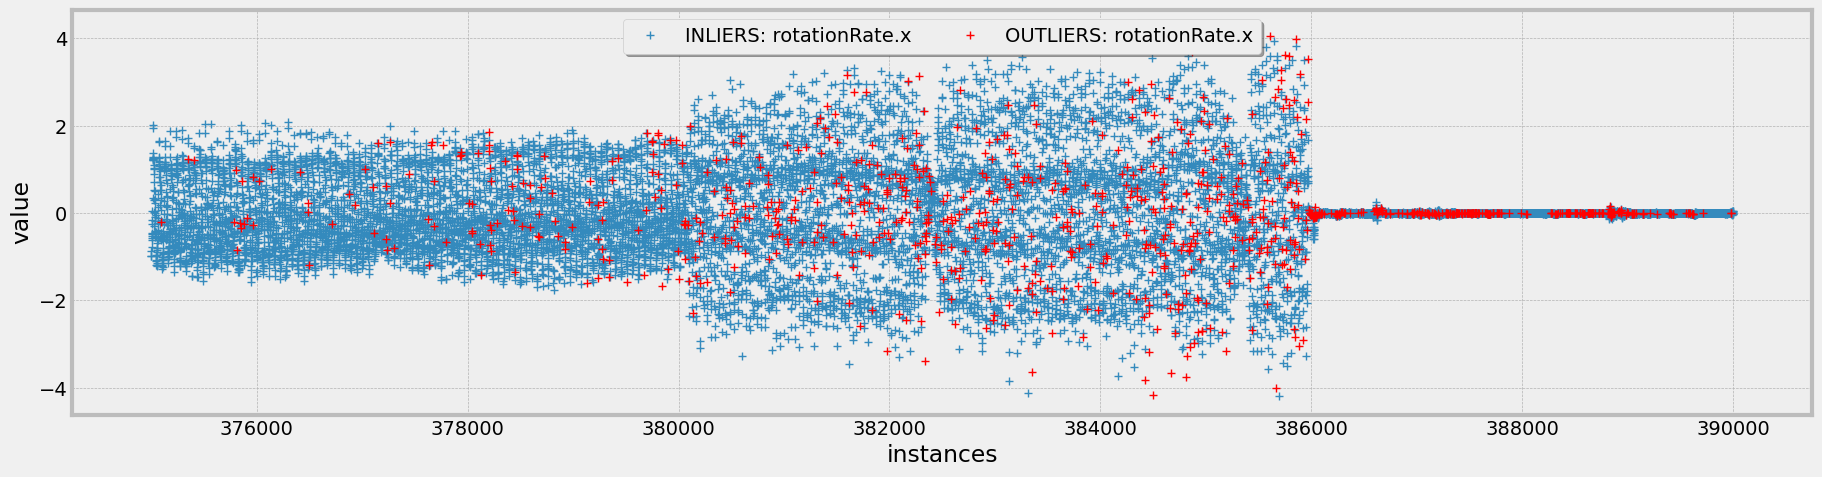

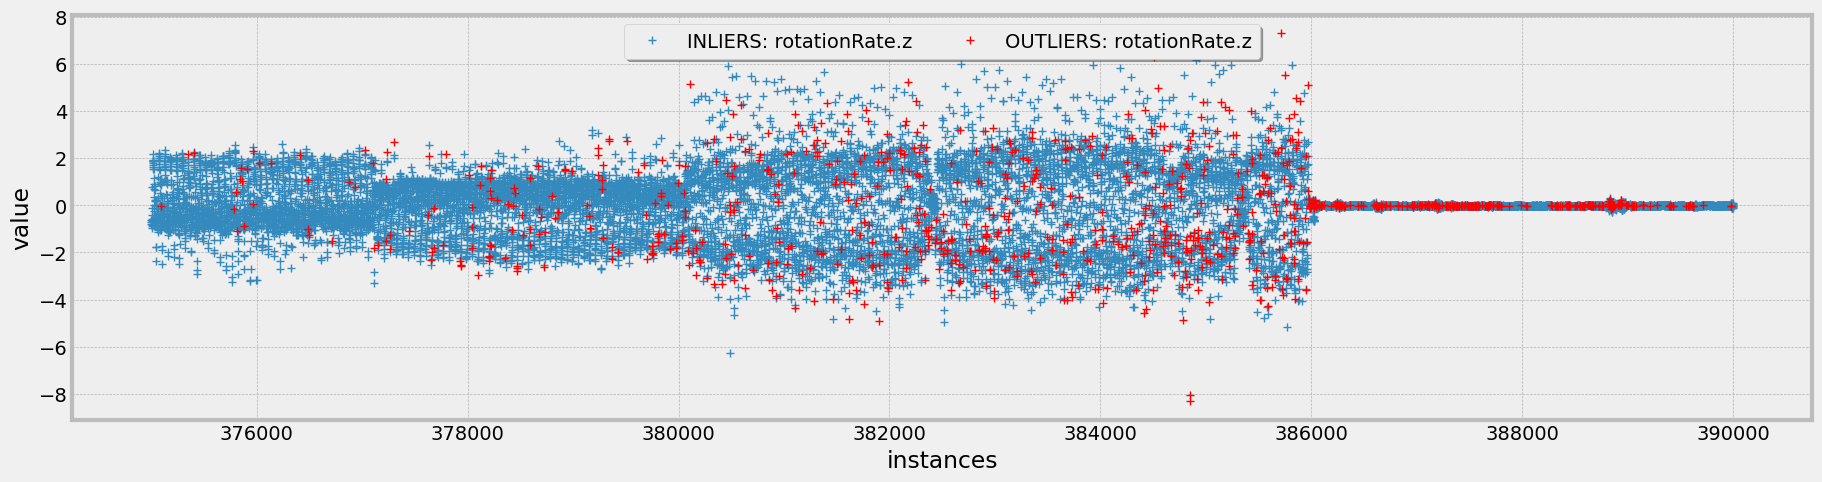

In [ ]:
for activity in out_cols[:3]:
    plot_outliers(dataset=dataset3.iloc[375_000:390_000], col = activity, outlier_col="outlier_", reset_index = False)

##6.2 PLOT OUTLIERS FOR ALL 1.4 MILLION instances.

In [ ]:
for activity in out_cols[:3]:
    plot_outliers(dataset=dataset3, col = activity, outlier_col="outlier_", reset_index = True)

##6.3 VISUALIZE the outliers in 3-Dimension

<ipython-input-36-3d707d316731>:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


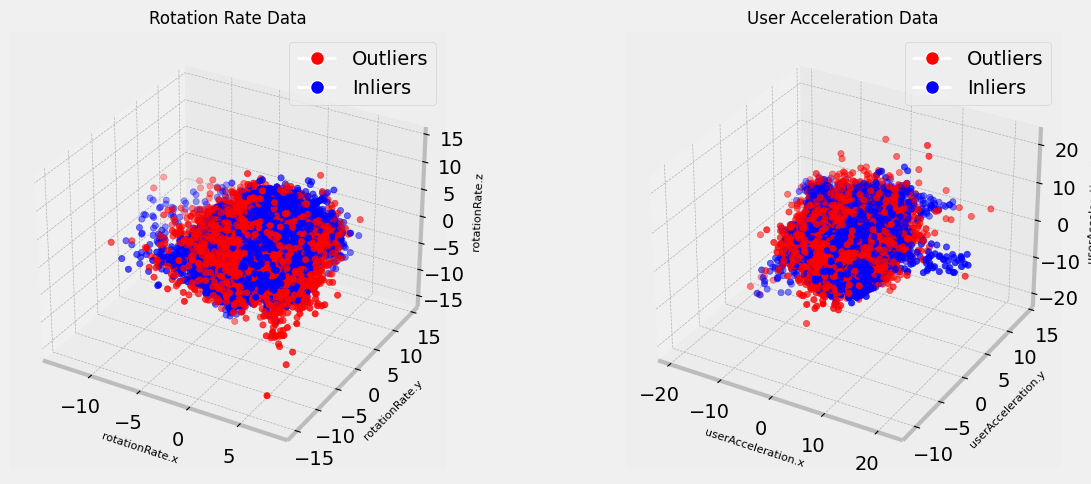

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
dataset = dataset3
outliers = outliers3
plt.style.use('bmh')
# Create a 1x2 subplot grid with 3D projection
fig = plt.figure(figsize=(14, 5))
colors = ['red' if label==-1 else 'blue' for label in outliers]

# Plot 1: rotationRate data
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(dataset['rotationRate.x'], dataset['rotationRate.y'], dataset['rotationRate.z'], c=colors)
ax1.set_xlabel('rotationRate.x', fontsize = 8)
ax1.set_ylabel('rotationRate.y', fontsize = 8)
ax1.set_zlabel('rotationRate.z', fontsize = 8)
ax1.set_title('Rotation Rate Data', fontsize = 12)


# Plot 2: userAcceleration data
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(dataset['userAcceleration.x'], dataset['userAcceleration.y'], dataset['userAcceleration.z'], c=colors)
ax2.set_xlabel('userAcceleration.x', fontsize = 8)
ax2.set_ylabel('userAcceleration.y', fontsize = 8)
ax2.set_zlabel('userAcceleration.z', fontsize = 8)
ax2.set_title('User Acceleration Data', fontsize = 12)

# Create a legend
legend_labels = {'Outliers': 'red', 'Inliers': 'blue'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=value) for key, value in legend_labels.items()]

# Add the legend to both plots
ax1.legend(handles=legend_elements)
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.rc('font', size=8)
plt.show()

##6.4 Proportion of noise in the data

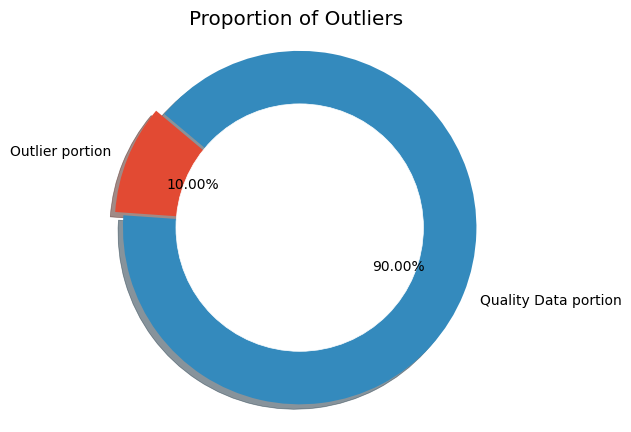

In [ ]:
num_outliers = dataset['outlier_'].sum()
num_inliers = len(dataset) - num_outliers

plt.style.use('ggplot')

# Create data for the donut chart
labels = ['Outlier portion', 'Quality Data portion']
sizes = [num_outliers, num_inliers]
#colors = ['red', 'green']
outer_circle_radius = 0.7  # Adjust the radius to control the thickness of the donut hole


# Create the outer pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.2f%%',
       explode = (0.05,0),
       startangle=140, radius=1, shadow = True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a white circle to make it a donut chart
center_circle = plt.Circle((0, 0), outer_circle_radius, color='white')
ax.add_artist(center_circle)

# Set a title for the donut chart
plt.title('Proportion of Outliers')

# Show the donut chart
plt.show()


# 7. Extract quality data from the Raw Data
We extract the quality data in a csv file which we will use later to train the CNN model.

In [ ]:
quality_data = raw_data[dataset["outlier_"]== False]
print(f"The QUALITY data count:{quality_data.shape[0]},\n The RAW data count:{raw_data.shape[0]}", )

The QUALITY data count:1271578,
 The RAW data count:1412865


In [ ]:
quality_data.shape

(1271578, 8)

The quality portion has been extracted to the local folder

In [ ]:
quality_data.to_csv(PATH+'/qaulity_dataset_lof-0.1.csv', index=False)

# 8. TRAIN CNN MODELS

**DO NOT RUN THIS SECTION (SECTION 8).**

I have provided a saved model to save time and computational resources. The model_load() function can be found in** SECTION 9.**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import os

def create_windows(data, window_size, step_size=1, with_label=True):
    """
    Create windows from a data matrix.
    data: The input data. The last column is assumed to be the label if with_label is True.
    window_size: The size of the sliding window.
    step_size: The step size of the sliding window.
    with_label: Whether the data contains a label column.
    """
    windows, labels = [], []
    for i in range(0, len(data) - window_size + 1, step_size):
        window = data[i:i + window_size, :-1]
        windows.append(window)
        if with_label:
            # Take the mode (most common) label in the window as the label for this window
            label = np.bincount(data[i:i + window_size, -1].astype(int)).argmax()
            labels.append(label)
    return np.array(windows), np.array(labels)




In [ ]:
def create_model(X_train, y_train, init_lr = 0.0005, task = 'multi_class'):
  # Build Model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128, kernel_size=(4, X_train.shape[2]), activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1] if task == 'multi_class' else 1, activation='softmax' if task == 'multi_class' else 'sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=init_lr),
                  loss='categorical_crossentropy' if task == 'multi_class' else 'binary_crossentropy',
                  metrics=['accuracy'])
    print("---> Creating CNN model completed")
    return model

In [ ]:
from keras.models import load_model
import time
import os

def train_model(model_PATH, hist_PATH, X_train, y_train, epochs):
  #Early stopping callback
  #cnn_es_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

  init_lr = 0.0005
  # Check if the CNN model can be reused
  if os.path.exists(model_PATH):
      # load the model;
      cnn_model = load_model(model_PATH)

      #display model architecture;
      cnn_model.summary()

      #train for one epoch
      cnn_model_history = cnn_model.fit(X_train, y_train, epochs=1, #Train model for 1 epoches
                      batch_size=32, validation_split =0.2)
      cnn_model_his = np.load(hist_PATH, allow_pickle=True).item()

  else:
      cnn_model = create_model( X_train, y_train, init_lr =init_lr)
      cnn_model.summary()
      # Start measuring time
      start_time = time.time()
      cnn_model_his= cnn_model.fit(X_train, y_train, epochs=epochs,
                            batch_size=32, validation_split=0.2)
      # Stop measuring time
      end_time = time.time()

      # Calculate the elapsed time
      elapsed_time_cnn = end_time - start_time
      print(f"Model training completed in: {elapsed_time_cnn} seconds")

      cnn_model.save(model_PATH, save_format='tf') #save model

      #Option to save training history. The history can be loaded later for measuring accuracy, loss and learning rates
      #However, it significantly increases the size of the model.

      np.save(hist_PATH, cnn_model_his)
      #cnn_model_his = np.load('Chojay_Tshewang-CNN/cnn_model_his.npy', allow_pickle=True).item()
  return cnn_model, cnn_model_his

In [ ]:
# Function for plotting Accuracy, Loss and Learning curves
def plot_history(model_history):
    # Create a 1x2 grid of subplots
    plt.style.use("default")
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Plot Accuracy Curve
    axes[0].plot(model_history.history['accuracy'], 'r-', label='Training Accuracy')
    axes[0].plot(model_history.history['val_accuracy'], 'b-', label='Validation Accuracy')
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_title("Accuracy Curve")
    axes[0].grid(True)
    axes[0].legend(loc="lower right")

    # Plot Loss Curve
    axes[1].plot(model_history.history['loss'], 'r-', label='Training Loss')
    axes[1].plot(model_history.history['val_loss'], 'b-', label='Validation Loss')
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Loss")
    axes[1].set_title("Loss Curve")
    axes[1].grid(True)
    axes[1].legend(loc="upper right")


    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_cm(y_train, y_train_pred, y_test, y_test_pred):
  #  CONFUSION MATRIX
  y_train = np.argmax(y_train, axis=-1)
  y_test = np.argmax(y_test, axis=-1)

  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  plt.subplots_adjust(wspace=0.7)
  plt.rc('font', size=9)
  cm_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], display_labels=ACT_LABELS)
  axs[0].set_title("Confusion matrix: Training")
  axs[0].set_xticklabels(ACT_LABELS, rotation=90)
  cm_train.im_.colorbar.remove()
  axs[0].set_ylabel('TRUE LABEL')
  axs[0].set_xlabel('PREDICTED LABEL')

  plt.rc('font', size=10)
  cm_test =ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], display_labels=ACT_LABELS)
  axs[1].set_title("Confusion matrix: Testing")
  axs[1].set_xticklabels(ACT_LABELS, rotation=90)
  cm_test.im_.colorbar.remove()
  axs[1].set_ylabel('')
  axs[1].set_xlabel('PREDICTED LABEL')
  plt.show()

In [ ]:
def eval_model(model, X_set, y_set, task = 'multi_class'):
      # Evaluate
  y_pred_proba = model.predict(X_set)
  y_pred = np.argmax(y_pred_proba, axis=1) #if task == 'multi_class' else (y_pred_proba > 0.5).astype("int32")
  y_labels = np.argmax(y_set, axis=1) #if task == 'multi_class' else y_test

  return y_pred_proba, y_pred, y_labels


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, accuracy_score
def perf_metric(y_train,y_train_pred,y_test,y_test_pred):

  # F1 SCORE FOR TRAINING SET

  f1_score_train_cnn = f1_score(y_train, y_train_pred, average='micro')
  accuracy_score_train_cnn = accuracy_score(y_train, y_train_pred)

  # F1 SCORE FOR TESTING SET
  f1_score_test_cnn = f1_score(y_test, y_test_pred, average='micro')
  accuracy_score_test_cnn = accuracy_score(y_test, y_test_pred)

  #prepare data frame for all the precision scores
  dset_ls = ["Training", "Testing"]
  f1_ls_cnn = [f'{f1_score_train_cnn:.2%}' , f'{f1_score_test_cnn:.2%}' ]
  acc_ls_cnn = [f'{accuracy_score_train_cnn:.2%}', f'{accuracy_score_test_cnn:.2%}' ]
  xcols = ['F1 SCORE', 'ACCURACY SCORE']

  data = {'F1 SCORE': f1_ls_cnn, 'ACCURACY SCORE': acc_ls_cnn}
  df = pd.DataFrame(data, index=dset_ls, columns=xcols)
  print("\033[1m","------------PERFORMANCE MEASURES----------",'\033[0m')
  df

In [ ]:
def transform_data(dataset, task = 'multi_class',
                   window_size=50, step_size=1,
                   positive_label=None, preprocess='standard'):
  target='act'
  # Convert to windows
  if task == 'multi_class':
      data_with_labels = np.c_[dataset.drop(columns=[target]).values,
                              pd.factorize(dataset[target])[0]]  # Convert labels to integers
  else:
      data_with_labels = np.c_[dataset.drop(columns=[target]).values,
                              dataset[target].apply(lambda x: 1 if x == positive_label else 0).values]

  X, y = create_windows(data_with_labels, window_size, step_size)
  if task == 'multi_class':
      y = pd.get_dummies(y).values

  # Preprocess
  if preprocess == 'standard':
      print("---> Data Standardization Started")
      start_std = time.time()
      X = np.array([StandardScaler().fit_transform(window) for window in X])
        # Stop measuring time
      end_std = time.time()

      # Calculate the elapsed time
      elapsed_time_std = end_std - start_std
      print(f"Standardization Completed in: {elapsed_time_std} seconds")
  elif preprocess == 'normal':
      print("---> Data Normalization")
      X = np.array([MinMaxScaler().fit_transform(window) for window in X])

  X = np.expand_dims(X, axis=3)  # Add a channel dimension

  return X, y

In [ ]:
def optimized_train_eval_model(dataset, model_PATH, hist_PATH, X, y,
                               test_size=0.2, random_state=None, epochs=10,
                               batch_size=32, save_model=False):



    # Train-test split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print("--->Training Model")
    model, history = train_model(model_PATH, hist_PATH, X_train, y_train, epochs=epochs)
    # Get Model Evaluation Results
    print("---> Model Evaluation-Train")
    y_train_pred_proba, y_train_pred, y_train_labels = eval_model(model, X_set = X_train, y_set = y_train)

    print("---> Model Evaluation - Test")
    y_test_pred_proba, y_test_pred, y_test_labels = eval_model(model, X_set = X_test, y_set= y_test)


    return history, X_train, X_test, y_train, y_train_pred, y_train_labels, y_test, y_test_pred, y_test_labels

# Example usage:
#file_path = 'clean.csv'
"""
results = optimized_train_eval_model(file_path, target='act', task='multi_class', positive_label=None,
                 preprocess='standard', test_size=0.2,
                 random_state=42, epochs=10, batch_size=32,
                 save_model=True)

"""

"\nresults = optimized_train_eval_model(file_path, target='act', task='multi_class', positive_label=None,\n                 preprocess='standard', test_size=0.2,\n                 random_state=42, epochs=10, batch_size=32,\n                 save_model=True)\n\n"

## 8.1 TRAIN CNN on RAW DATA

**DO NOT RUN THIS SECTION (SECTION 8).**

I have provided a saved model to save time and computational resources. The model_load() function can be found in **SECTION 9**.

In [ ]:
# Load Data
file_path = PATH + 'clean.csv'
dataset = pd.read_csv(file_path)
X, y = transform_data(dataset)

---> Data Standardization Started
Standardization Completed in: 564.4676020145416 seconds


In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=None)
#Save Test data.
data_PATH = PATH + 'CNN_Quality_Best_TestData/'
# Save X_test
np.save(data_PATH + 'X_test_raw.npy', X_test_r)
# Save y_test
np.save(data_PATH + 'y_test_raw.npy', y_test_r)


In [ ]:
# Save X
np.save(PATH + 'NP_Data/X.npy', X)

In [ ]:
# Save y
np.save(PATH + 'NP_Data/y.npy', y)

In [ ]:
#### DO NOT RUN THIS IF YOU WANT TO LOAD MODEL
model_PATH = PATH + 'CNN_Raw'
hist_PATH = PATH + 'CNN_Raw/raw_cnn_hist.npy'
history, X_train, X_test, y_train, y_train_pred, y_train_labels, y_test, y_test_pred, y_test_labels = optimized_train_eval_model(dataset, model_PATH, hist_PATH, X,y, epochs = 10)

--->Training Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 1, 128)        3712      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 1, 128)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 1, 128)        0         
                                                                 
 flatten (Flatten)           (None, 2944)              0         
                                                                 
 dense (Dense)               (None, 128)               376960    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                     

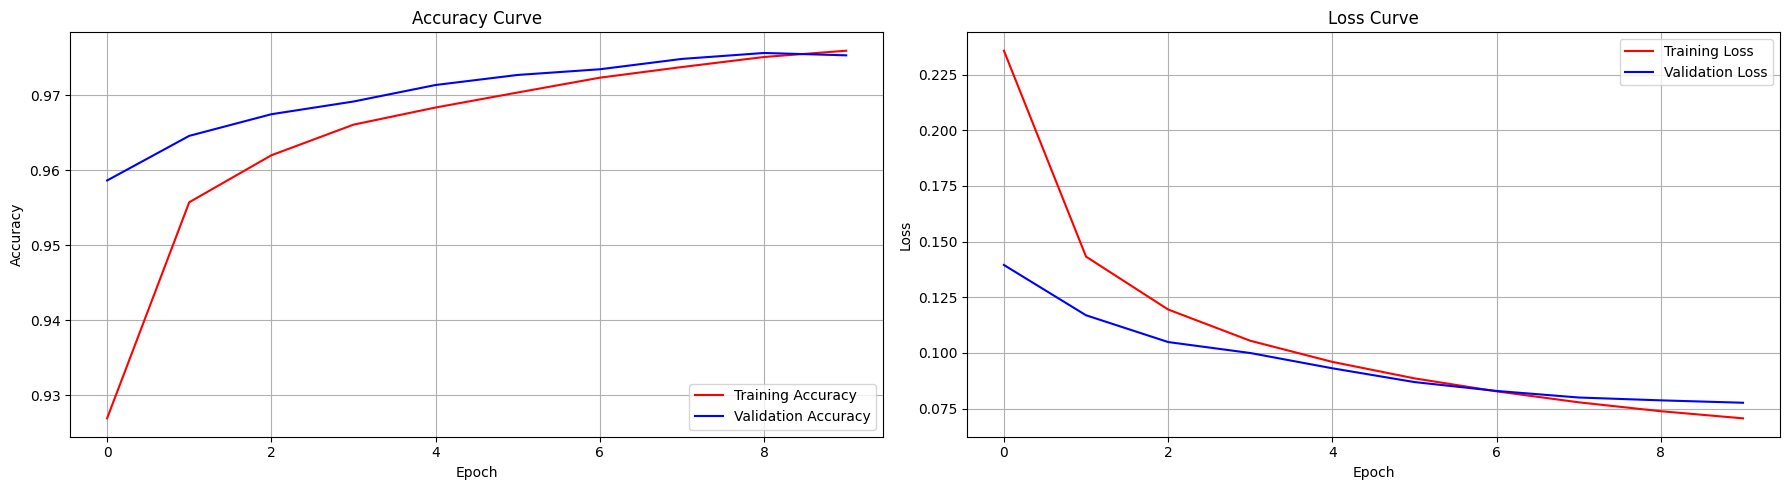

In [ ]:
# Plot training & validation accuracy values
plot_history(history)

### 8.1.1 performances

In [ ]:
class_report_train = classification_report(y_train_labels, y_train_pred)
print(class_report_train)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    105772
           1       0.98      0.97      0.97    126004
           2       0.99      0.99      0.99    274874
           3       0.99      1.00      0.99    107607
           4       0.99      0.98      0.99    244977
           5       0.98      0.99      0.99    271018

    accuracy                           0.99   1130252
   macro avg       0.98      0.98      0.98   1130252
weighted avg       0.99      0.99      0.99   1130252



In [ ]:
class_report_test = classification_report(y_test_labels, y_test_pred)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     26083
           1       0.98      0.96      0.97     31281
           2       0.99      0.99      0.99     69414
           3       0.99      0.99      0.99     26624
           4       0.99      0.98      0.98     61450
           5       0.98      0.99      0.99     67712

    accuracy                           0.98    282564
   macro avg       0.98      0.98      0.98    282564
weighted avg       0.98      0.98      0.98    282564



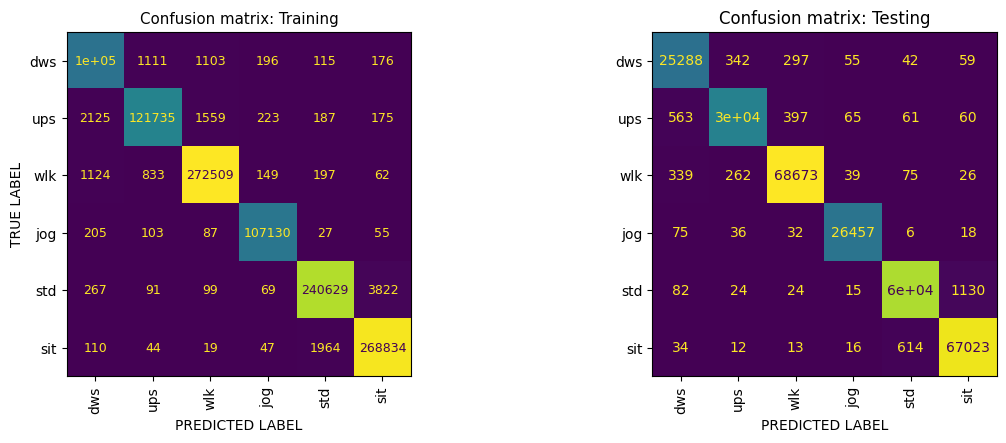

In [ ]:
# Plot Confusion Matrix
plot_cm(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
# Plot ROC Curves
plot_roc(dataset, y_train, y_train_pred)
plot_roc(dataset, y_test, y_test_pred)

IndexError: ignored

## 8.2 TRAINING CNN ON QUALITY DATA WITH DEFAULT PARAMETERS

In [ ]:
q_model_PATH = PATH + 'CNN_Quality'
q_hist_PATH = PATH + 'CNN_Quality/quality_cnn_hist.npy'

In [ ]:
q_model_PATH = PATH + 'CNN_Quality'
q_hist_PATH = PATH + 'CNN_Quality/quality_cnn_hist.npy'


if os.path.exists(PATH + 'NP_Data/quality'):
  q_X = np.load(PATH + 'NP_Data/quality/q_X.npy', allow_pickle=True).item()
  q_y = np.load(PATH + 'NP_Data/quality/q_y.npy', allow_pickle=True).item()

else:
  # Load Data
  q_file_path = PATH + 'qaulity_dataset_lof.csv'
  q_dataset = pd.read_csv(q_file_path)
  q_X, q_y = transform_data(dataset=q_dataset)
  # Save X
  np.save(PATH + 'NP_Data/quality/q_X.npy', q_X)
  # Save y
  np.save(PATH + 'NP_Data/quality/q_y.npy', q_y)


---> Data Standardization Started
Standardization Completed in: 721.408618927002 seconds


In [ ]:
q_history, X_train_q, X_test_q, y_train_q, y_train_pred_q, y_train_labels_q, y_test_q, y_test_pred_q, y_test_labels_q = optimized_train_eval_model(dataset=q_dataset, model_PATH=q_model_PATH,
                                                                                                                                                   hist_PATH=q_hist_PATH, X=q_X,y=q_y, epochs = 10)

In [ ]:
# Plot training & validation accuracy values
plot_history(q_history)

In [ ]:
class_report_train_q = classification_report(y_train_labels_q, y_train_pred_q)
print(class_report_train_q)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    104888
           1       0.98      0.96      0.97    125526
           2       0.99      0.99      0.99    275360
           3       1.00      0.99      1.00    106219
           4       0.99      0.99      0.99    243305
           5       0.98      0.99      0.99    268158

    accuracy                           0.99   1123456
   macro avg       0.99      0.98      0.98   1123456
weighted avg       0.99      0.99      0.99   1123456



In [ ]:
class_report_test_q = classification_report(y_test_labels_q, y_test_pred_q)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     26337
           1       0.98      0.95      0.97     31419
           2       0.98      0.99      0.99     69072
           3       0.99      0.99      0.99     26888
           4       0.99      0.98      0.98     61127
           5       0.98      0.99      0.98     67721

    accuracy                           0.98    282564
   macro avg       0.98      0.98      0.98    282564
weighted avg       0.98      0.98      0.98    282564



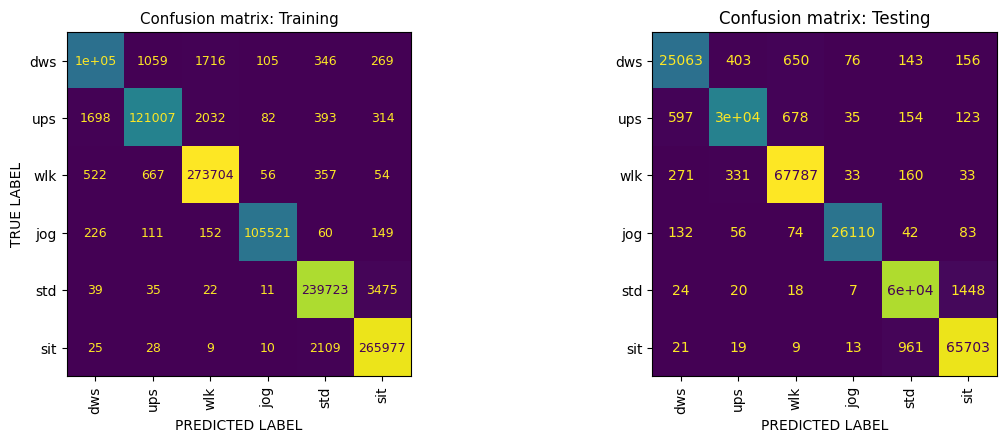

In [ ]:
# Plot Confusion Matrix
plot_cm(y_train_q, y_train_pred_q, y_test_q, y_test_pred_q)

## 8.3 TRAINING CNN ON BEST HYPERPARAMETERS

In [ ]:
import os
q_model_PATH = PATH + 'CNN_Quality_Best'
q_hist_PATH = PATH + 'CNN_Quality/quality_cnn_hist_best.npy'


if os.path.exists(PATH + 'NP_Data/quality_best'):
  q_X = np.load(PATH + 'NP_Data/quality/q_X_best.npy', allow_pickle=True).item()
  q_y = np.load(PATH + 'NP_Data/quality/q_y_best.npy', allow_pickle=True).item()

else:
  # Load Data
  q_file_path = PATH + 'qaulity_dataset_lof-0.1.csv'
  q_dataset = pd.read_csv(q_file_path)
  q_X_best, q_y_best = transform_data(dataset=q_dataset)
  # Save X
  #np.save(PATH + 'NP_Data/quality/q_X_best.npy', q_X)
  # Save y
  #np.save(PATH + 'NP_Data/quality/q_y.npy_best', q_y)


---> Data Standardization Started
Standardization Completed in: 488.3438653945923 seconds


In [ ]:
q_history, X_train_q, X_test_q, y_train_q, y_train_pred_q, y_train_labels_q, y_test_q, y_test_pred_q, y_test_labels_q = optimized_train_eval_model(dataset=q_dataset, model_PATH=q_model_PATH,
                                                                                                                                                   hist_PATH=q_hist_PATH, X=q_X_best,y=q_y_best, epochs = 10)

--->Training Model
---> Creating CNN model completed
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 1, 128)        3712      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 1, 128)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 1, 128)        0         
                                                                 
 flatten (Flatten)           (None, 2944)              0         
                                                                 
 dense (Dense)               (None, 128)               376960    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
   

In [ ]:
#Save Test data.
data_PATH = PATH + 'CNN_Quality_Best_TestData/'
# Save X_test
np.save(data_PATH + 'X_test_best.npy', X_test_q)
# Save y_test
np.save(data_PATH + 'y_test_best.npy', y_test_q)

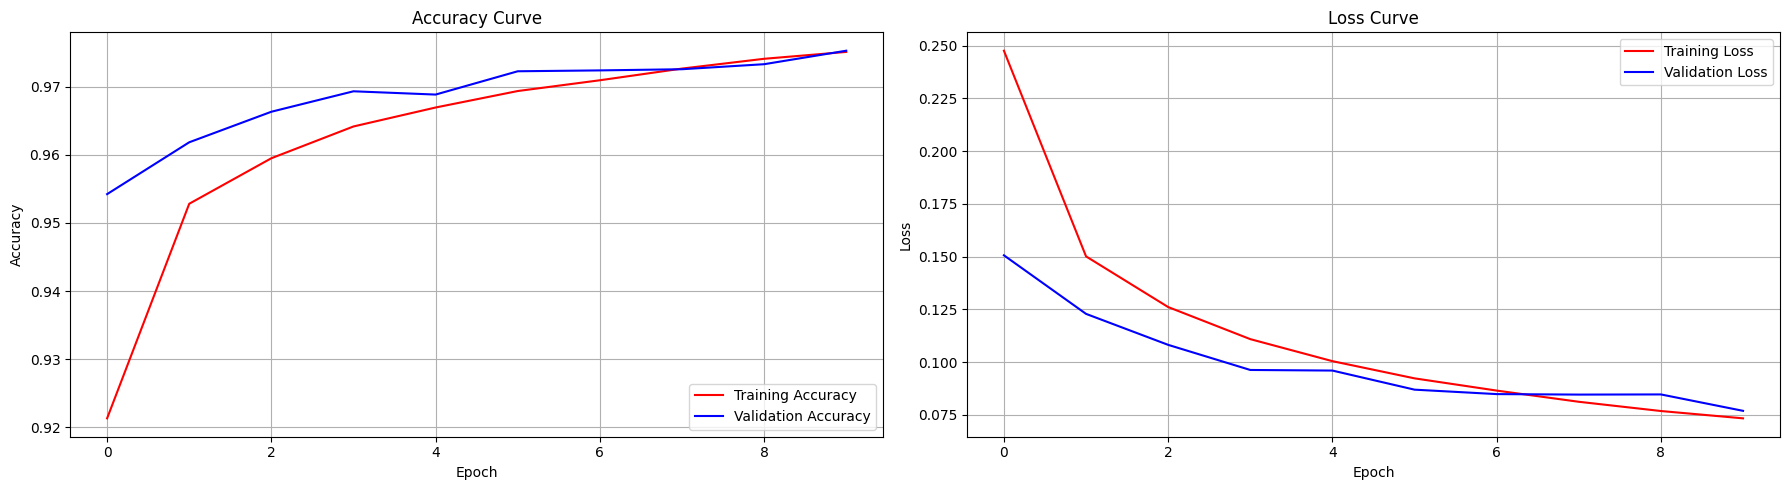

In [ ]:
# Plot training & validation accuracy values
plot_history(q_history)

In [ ]:
class_report_train_q = classification_report(y_train_labels_q, y_train_pred_q)
print(class_report_train_q)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     97154
           1       0.98      0.97      0.97    119230
           2       0.99      0.99      0.99    266033
           3       1.00      0.99      0.99     92023
           4       0.98      0.99      0.99    214795
           5       0.99      0.99      0.99    227988

    accuracy                           0.99   1017223
   macro avg       0.99      0.98      0.98   1017223
weighted avg       0.99      0.99      0.99   1017223



In [ ]:
class_report_test_q = classification_report(y_test_labels_q, y_test_pred_q)
print(class_report_test_q)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     24499
           1       0.97      0.95      0.96     29537
           2       0.98      0.99      0.98     66393
           3       0.99      0.98      0.99     22954
           4       0.97      0.98      0.98     53669
           5       0.98      0.98      0.98     57254

    accuracy                           0.98    254306
   macro avg       0.97      0.97      0.97    254306
weighted avg       0.98      0.98      0.98    254306



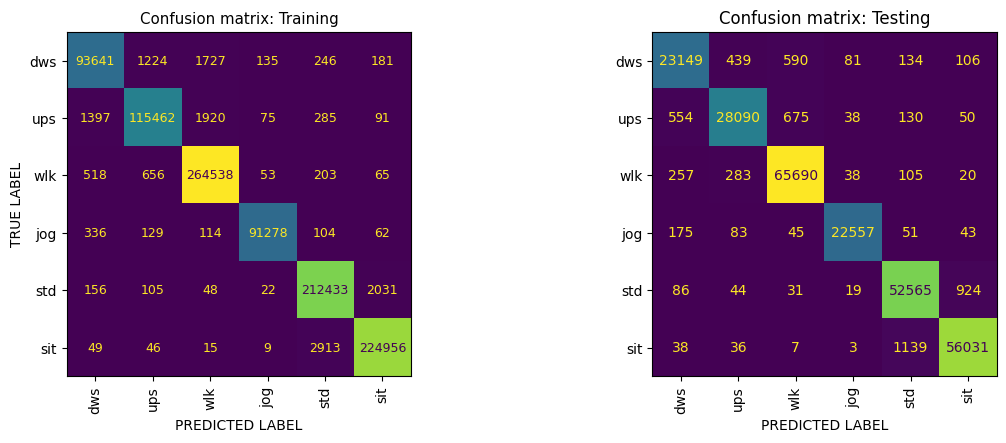

In [ ]:
# Plot Confusion Matrix
plot_cm(y_train_q, y_train_pred_q, y_test_q, y_test_pred_q)

# 9. PERFORMANCE COMPARISON SUMMARY

## 9.1 LOAD TRAINED MODELS

In [16]:
### LOAD MODELS
import os
from keras.models import load_model

# Define paths for the models
raw_PATH = PATH + 'CNN_Raw'
quality_def_PATH = PATH + 'CNN_Quality_def'
quality_opt_PATH = PATH + 'CNN_Quality_Best'

# List of CNN models
cnn_ls = {'cnn_raw': [raw_PATH, None],  # Initialize the model value as None
          'cnn_q_def': [quality_def_PATH, None],
          'cnn_q_opt': [quality_opt_PATH, None]
          }

# Check if the CNN models are saved and load them
for model_name, model_info in cnn_ls.items():
    model_path = model_info[0]
    if os.path.exists(model_path):
        # Load the model
        model_info[1] = load_model(model_path)
    else:
        print(f"----> No model found for {model_name}.")


In [43]:
#from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_score, recall_score

#Function to make prediction
def pred(cnn,X):
    y_pred = cnn.predict(X)
    return y_pred

def perf(y,y_pred):
    # calculates precision score
    prec= precision_score(y, y_pred)
    prec_score=round(prec*100,2)

    # calculates recall score
    rs = recall_score(y, y_pred)
    #print("3. RECALL:", round(rs*100,2), "%")
    rec_score=round(rs*100,2)

    return prec_score, rec_score


def plot_roc_multimodel(y_set1, y_set2, y_set_pred_proba, model_names):
    n_classes = y_set1.shape[1]

    # Create a grid of subplots for ROC curves
    n_rows, n_cols = 2, 3
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 7))
    axes = axes.ravel()

    for i in range(n_classes):
        ax = axes[i]

        for model_name in model_names:
            if model_name == 'cnn_raw':
                y_set = y_set1
            elif model_name == 'cnn_lof_quality':
                y_set = y_set2
            else:
                raise ValueError(f"Unknown model name: {model_name}")

            fpr, tpr, _ = roc_curve(y_set[:, i], y_set_pred_proba[model_name][:, i])
            roc_auc = auc(fpr, tpr)
            if model_name == 'cnn_lof_quality':
              ax.plot(fpr, tpr, lw=2, label=f'{model_name}', linestyle=(0,(5,10)))
            else:
              ax.plot(fpr, tpr, lw=2, label=f'{model_name}')

        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([-0.1, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for Class {i}')
        ax.legend(loc="lower right")

    # Remove any empty subplots
    for i in range(n_classes, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [68]:
import matplotlib.pyplot as plt

# Function for plotting Accuracy, Loss and Learning curves for multiple models
def plot_history(model_histories, model_labels, linestyles):
    # Create a 1x2 grid of subplots
    plt.style.use("default")
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Plot Accuracy Curve for each model
    for i, model_history in enumerate(model_histories):
        training_accuracy = model_history.history['accuracy']
        validation_accuracy = model_history.history['val_accuracy']
        training_color = 'r'  # Blue for training accuracy
        validation_color = 'b'  # Red for validation accuracy
        linestyle = linestyles[i]

        label = f'{model_labels[i]} Training Accuracy'
        axes[0].plot(training_accuracy, linestyle, color=training_color, label=label)

        label = f'{model_labels[i]} Validation Accuracy'
        axes[0].plot(validation_accuracy, linestyle, color=validation_color, label=label)

    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_title("Accuracy Curve")
    axes[0].grid(True)
    axes[0].legend(loc="lower right")

    # Plot Loss Curve for each model
    for i, model_history in enumerate(model_histories):
        training_loss = model_history.history['loss']
        validation_loss = model_history.history['val_loss']
        training_color = 'r'  # Blue for training loss
        validation_color = 'b'  # Red for validation loss
        linestyle = linestyles[i]

        label = f'{model_labels[i]} Training Loss'
        axes[1].plot(training_loss, linestyle, color=training_color, label=label)

        label = f'{model_labels[i]} Validation Loss'
        axes[1].plot(validation_loss, linestyle, color=validation_color, label=label)

    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Loss")
    axes[1].set_title("Loss Curve")
    axes[1].grid(True)
    axes[1].legend(loc="upper right")

    plt.tight_layout()
    plt.show()

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_cms(y_test_raw, y_test_pred_raw, y_test_quality, y_test_pred_quality):
  #  CONFUSION MATRIX
  #y_train = np.argmax(y_train, axis=-1)
  plt.style.use('bmh')
  y_test_raw = np.argmax(y_test_raw, axis=-1)
  y_test_quality = np.argmax(y_test_quality, axis=-1)

  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  plt.subplots_adjust(wspace=0.7)
  plt.rc('font', size=9)
  cm_raw =ConfusionMatrixDisplay.from_predictions(y_test_raw, y_test_pred_raw, ax=axs[0], display_labels=ACT_LABELS,normalize="true", values_format=".00%")
  axs[0].set_title("Confusion matrix: Raw Data")
  axs[0].set_xticklabels(ACT_LABELS, rotation=90)
  cm_raw.im_.colorbar.remove()
  axs[0].set_ylabel('TRUE LABEL')
  axs[0].set_xlabel('PREDICTED LABEL')

  plt.rc('font', size=10)
  cm_quality =ConfusionMatrixDisplay.from_predictions(y_test_quality, y_test_pred_quality, ax=axs[1], display_labels=ACT_LABELS,normalize="true", values_format=".00%")
  axs[1].set_title("Confusion matrix: Quality data (LOF)")
  axs[1].set_xticklabels(ACT_LABELS, rotation=90)
  cm_quality.im_.colorbar.remove()
  axs[1].set_ylabel('')
  axs[1].set_xlabel('PREDICTED LABEL')
  plt.show()

In [18]:
#ASSIGN THE CNN MODELS
cnn_raw=cnn_ls['cnn_raw'][1]
cnn_quality_def=cnn_ls['cnn_q_def'][1]
cnn_quality_opt =cnn_ls['cnn_q_opt'][1]

## 9.2 LOAD TEST DATA

In [19]:
cnn_raw_X_test =np.load(PATH+"TestData/raw_X_test.npy",allow_pickle=True)
cnn_raw_y_test =np.load(PATH+"TestData/raw_y_test.npy",allow_pickle=True)
cnn_qopt_X_test =np.load(PATH+"TestData/best_X_test.npy",allow_pickle=True)
cnn_qopt_y_test =np.load(PATH+"TestData/best_y_test.npy",allow_pickle=True)



## 9.3 PREDICT MODELS

In [20]:
#predict using test sets
y_pred_raw_prob=pred(cnn_raw,cnn_raw_X_test)
y_pred_raw = np.argmax(y_pred_raw_prob, axis=1)

y_pred_qopt_prob=pred(cnn_quality_opt,cnn_qopt_X_test)
y_pred_qopt = np.argmax(y_pred_qopt_prob, axis=1)

7948/7948 [==============================] - 11s 1ms/step


## 9.4 LOAD MODEL HISTORIES

In [ ]:
# PLOT MODEL HISTORY OF RAW CNN AND QUALITY CNN
raw_history = np.load(PATH+'CNN_History/raw_cnn_hist.npy', allow_pickle=True).item()
quality_lof_def_history = np.load(PATH+'CNN_History/quality_cnn_hist_def.npy', allow_pickle=True).item()
quality_lof_opt_history = np.load(PATH+'CNN_History/quality_cnn_hist_best.npy', allow_pickle=True).item()

## 9.5 MODEL COMPARISON

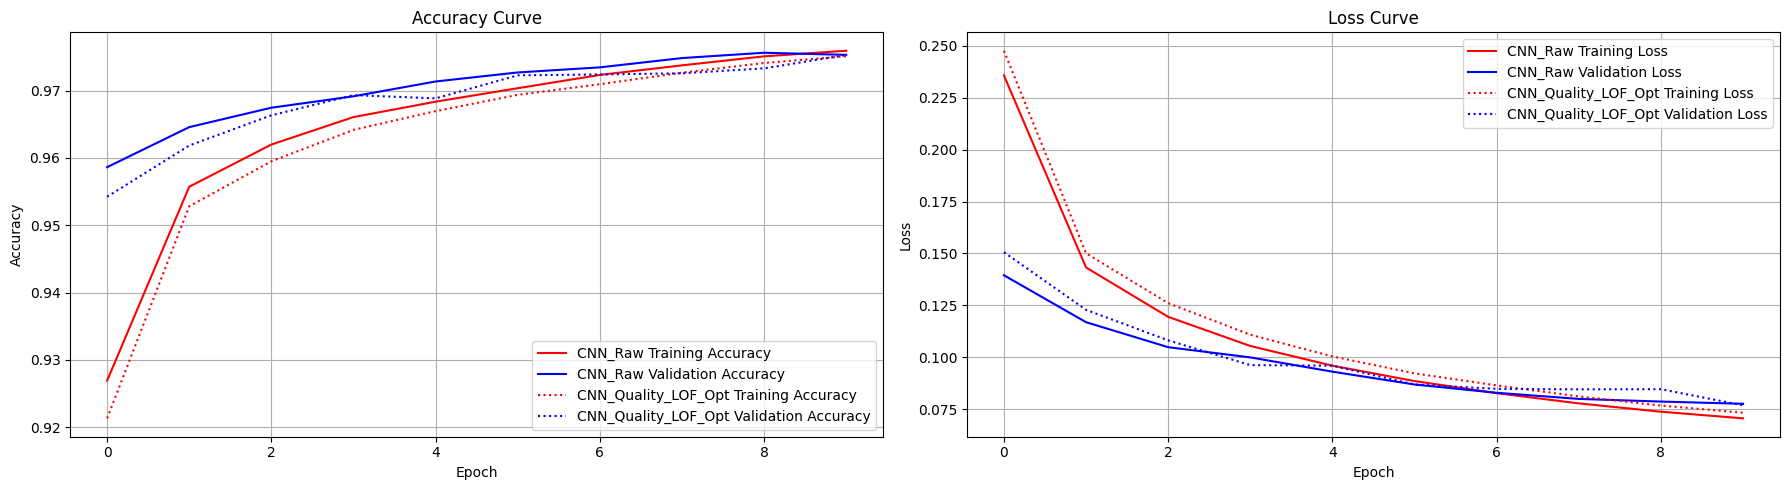

In [78]:
model_histories = [raw_history,  quality_lof_opt_history]
model_labels = ["CNN_Raw",  "CNN_Quality_LOF_Opt"]
linestyles = ['-', ':']  # Choose different linestyles for the models

plot_history(model_histories, model_labels, linestyles)


From the model history plots, we can observe that the training accuracy for the baseline CNN model (Raw Data) shows a little split towards the end of training epochs indicating a `slight overfitting issue`. The training accuracy goes higher than the validation accuracy in the raw data when the model run ends.

On the other hand the training accuracy and the validation accuracy of the CNN model on **QUALITY DATA (LOF) reaches to the same accuracy level** of the validation set of the CNN (Raw Data).

In [86]:
# PLOT CONFUSION MATRICES
plot_cms(cnn_raw_y_test, y_pred_raw, cnn_qopt_y_test, y_pred_qopt)

The confusion matrices indicates that the WALKING and STANDING were predicted same on both the CNN models (Raw data and quality data). However, for other activities, the CNN model on Raw data performs slighly better than the quality data. This indicates that the quality data doesn't necessarily guarantee better predictions.

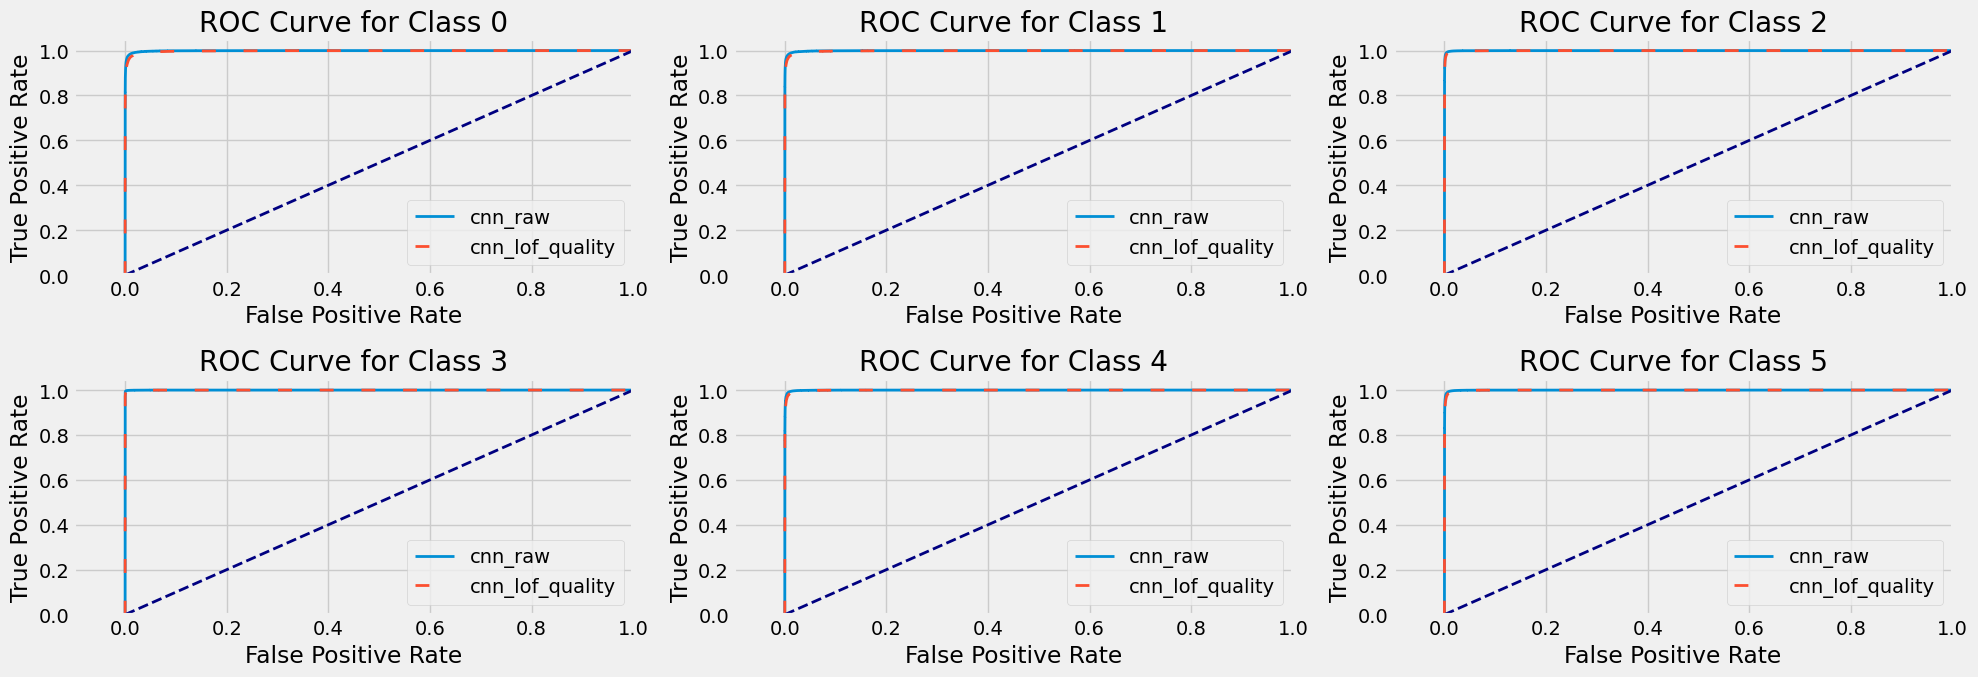

In [42]:
# PLOT ROC CURVES
model_names = ['cnn_raw', 'cnn_lof_quality']
y_pred_prob = {
    'cnn_raw': y_pred_raw_prob,
    'cnn_lof_quality': y_pred_qopt_prob,
}
y_set1 = cnn_raw_y_test
y_set2 = cnn_qopt_y_test
plot_roc_multimodel(y_set1, y_set2, y_pred_prob, model_names)

From the ROC curves, we do not observe much significant difference in the two models on prediction for the activities. This is evident as the missclassified instances have a very small proportion as compared the the large data instances (over 1.4 million).

#Conclusion

The CNN model with quality data (10% reduction in total instance) provides equally good prediction accuracy. This is a huge gain in large datasets containing millions of instances. Overall, the performance remains the same despite removal of 10% outliers from the dataset. If I am to choose one, I would definitely choose to use the model with lesser datapoints (with outliers removed).